In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


### **I. Tính toán Linear Regression không dùng đến thư viện**

#### **a. Cơ sở lý thuyết để tính toán**

Mục tiêu của Hồi quy Tuyến tính là tìm ra một mối quan hệ tuyến tính giữa các biến đặc trưng (biến độc lập $X$) và biến mục tiêu (biến phụ thuộc $y$). Phương pháp Bình phương Tối thiểu (Least Squares) là kỹ thuật tối ưu hóa cổ điển được sử dụng để tìm ra các hệ số hồi quy sao cho tổng bình phương của các sai số (khoảng cách giữa giá trị thực $y$ và giá trị dự đoán $\hat{y}$) là nhỏ nhất. Ta cần tìm ra vector hệ số hồi quy $\mathbf{\beta}$ sao cho $\mathbf{y} \approx \mathbf{X}\mathbf{\beta}$ bằng cách tối thiểu hóa tổng bình phương sai số.

Mô hình Hồi quy Tuyến tính Đa biến (Multiple Linear Regression) cho một điểm dữ liệu thứ $i$:$$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip} + \epsilon_i$$
- $y_i$: Là Biến Mục tiêu (hoặc Biến Phụ thuộc) cần được dự đoán.
- $\beta_0$: Là Hệ số Chặn (Intercept), là giá trị dự đoán của $y_i$ khi tất cả các biến đặc trưng ($x$) đều bằng 0.
- $\beta_1, \dots, \beta_p$: Là các Hệ số Hồi quy (Coefficients), đo lường sự thay đổi của $y_i$ khi thay đổi một đơn vị của biến đặc trưng tương ứng ($x_{i1}, \dots, x_{ip}$), giữ các biến khác cố định.
- $x_{i1}, \dots, x_{ip}$: Là các Biến Đặc trưng (hoặc Biến Độc lập) của điểm dữ liệu thứ $i$.
- $\epsilon_i$: Là Sai số (Error Term) hay Phần dư, là phần mà mô hình không giải thích đượ


##### **1. Thiết lập Mô hình và Ký hiệu Ma trận**
Mô hình hồi quy tuyến tính đa biến được biểu diễn dưới dạng ma trận như sau:$$\mathbf{y} = \mathbf{X}\mathbf{\beta} + \mathbf{\epsilon}$$Trong đó:
- $\mathbf{y}$: Vector mục tiêu ($n \times 1$).
- $\mathbf{X}$: Ma trận đặc trưng ($n \times (p+1)$), với cột đầu tiên là vector $\mathbf{1}$ (dành cho hệ số chặn $\beta_0$).
- $\mathbf{\beta}$: Vector hệ số hồi quy ($(p+1) \times 1$).
- $\mathbf{\epsilon}$: Vector phần dư/sai số ($n \times 1$).
##### **2. Hàm Mất mát Bình phương Tối thiểu (Least Squares Loss)**
Hàm mất mát (Loss Function) $L(\mathbf{\beta})$ là Tổng Bình phương Sai số (Sum of Squared Errors - SSE) giữa giá trị thực $\mathbf{y}$ và giá trị dự đoán $\mathbf{\hat{y}} = \mathbf{X}\mathbf{\beta}$:$$L(\mathbf{\beta}) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$Biểu diễn dưới dạng ma trận:$$L(\mathbf{\beta}) = (\mathbf{y} - \mathbf{X}\mathbf{\beta})^T (\mathbf{y} - \mathbf{X}\mathbf{\beta})$$
##### **3. Công thức Nghiệm Đóng (Normal Equation)**
Để tối thiểu hóa $L(\mathbf{\beta})$, ta lấy đạo hàm riêng theo $\mathbf{\beta}$ và đặt bằng $\mathbf{0}$:$$\frac{\partial L}{\partial \mathbf{\beta}} = -2\mathbf{X}^T (\mathbf{y} - \mathbf{X}\mathbf{\beta}) = \mathbf{0}$$Giải phương trình này, ta thu được Phương trình Chuẩn (Normal Equation):$$\mathbf{X}^T \mathbf{X}\mathbf{\beta} = \mathbf{X}^T \mathbf{y}$$Và nghiệm đóng cho vector hệ số tối ưu $\mathbf{\hat{\beta}}$ là:$$\mathbf{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

Sau khi tính toán được vector hệ số hồi quy tối ưu $\mathbf{\hat{\beta}}$ bằng công thức Normal Equation $\mathbf{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$, bước tiếp theo là đánh giá hiệu suất của mô hình. Bạn cần tính Hệ số Xác định ($R^2$) để đánh giá mức độ phù hợp của mô hình với dữ liệu, và sử dụng phương pháp Kiểm định Chéo (Cross-Validation - CV) để đánh giá khả năng tổng quát hóa của mô hình.
##### **Tính Hệ số Xác định ($R^2$)**
Hệ số Xác định ($R^2$ - Coefficient of Determination) là chỉ số quan trọng đo lường tỷ lệ phương sai của biến mục tiêu ($y$) được giải thích bởi mô hình. $R^2$ luôn nằm trong khoảng $[0, 1]$. Giá trị càng gần 1, mô hình càng phù hợp với dữ liệu.
- Bước 1: Tính Giá trị Dự đoán ($\mathbf{\hat{y}}$)
Sử dụng các hệ số $\mathbf{\hat{\beta}}$ đã tìm được để dự đoán giá trị $y$ cho tập dữ liệu:$$\mathbf{\hat{y}} = \mathbf{X}\mathbf{\hat{\beta}}$$
- Bước 2: Tính Giá trị Trung bình của $y$
 ($\bar{y}$)$$\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$$
- Bước 3: Tính các Tổng Bình phương
Để tính $R^2$, ta cần hai thành phần: Tổng Bình phương Phần dư ($SS_{res}$ - Residual Sum of Squares): Đo lường tổng lỗi (phần mà mô hình không giải thích được).$$SS_{res} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$Tổng Bình phương Toàn phần ($SS_{tot}$ - Total Sum of Squares): Đo lường tổng phương sai của $y$ (lỗi nếu chỉ dùng giá trị trung bình $\bar{y}$ để dự đoán).$$SS_{tot} = \sum_{i=1}^{n} (y_i - \bar{y})^2$$
- Bước 4: Tính $R^2$
$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

#### **b. Phần code**

In [2]:
df = pd.read_excel("/Users/thuytrangneee/Downloads/data0979_enriched.xlsx")
df = df.sort_values(by="Date")
y = df['Total_Order_Demand']
X = df.drop(columns=['Total_Order_Demand'])
# Remove datetime columns
X = X.select_dtypes(exclude=['datetime64[ns]', 'datetimetz'])
# One-hot encoding
X = pd.get_dummies(X, drop_first=True)
# Reset index
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
X_np = np.hstack((np.ones((X.shape[0], 1)), X.values.astype(float)))
y_np = y.values.reshape(-1, 1)

In [38]:
#Chia tập dữ liệu thành từng block, cứ train 2074, test 100 và tiếp tục như vậy đến hết tập dữ liệu
total_rows = len(X_np)
num_blocks = 6
block_size = total_rows // num_blocks  # 304
test_size = 100
train_size = block_size - test_size    # 204
print("Block size:", block_size)
print("Train size:", train_size)
print("Test size:", test_size)
block_id = 1
# LIST LƯU BLOCK
X_test_blocks = []
y_test_blocks = []
y_pred_blocks = []
R2_blocks = []
beta_list = []
for start in range(0, total_rows, block_size):
    if start + block_size > total_rows:
        break
    X_train_np = X_np[start : start + train_size]
    X_test_np  = X_np[start + train_size : start + block_size]
    y_train_np = y_np[start : start + train_size]
    y_test_np  = y_np[start + train_size : start + block_size]
    print(f"\n================ BLOCK {block_id} ================")
    print("Train:", start, "→", start + train_size)
    print("Test :", start + train_size, "→", start + block_size)
    # 🔹 NORMAL EQUATION
    XtX = X_train_np.T @ X_train_np
    Xty = X_train_np.T @ y_train_np
    beta_hat = np.linalg.pinv(XtX) @ Xty
    print("5 hệ số đầu tiên của beta_hat:")
    print(beta_hat[:5])
    y_pred_block = X_test_np @ beta_hat
    SS_res = np.sum((y_test_np - y_pred_block)**2)
    SS_tot = np.sum((y_test_np - np.mean(y_test_np))**2)
    R2_block = 1 - SS_res / SS_tot
    print("R²:", R2_block)
    X_test_blocks.append(X_test_np)
    y_test_blocks.append(y_test_np)
    y_pred_blocks.append(y_pred_block)
    R2_blocks.append(R2_block)
    beta_list.append(beta_hat)
    block_id += 1


Block size: 304
Train size: 204
Test size: 100

================ BLOCK 1 ================
Train: 0 → 204
Test : 204 → 304
5 hệ số đầu tiên của beta_hat:
[[ 5.69126358e+02]
 [-4.92982449e+01]
 [-1.69210791e-12]
 [ 9.54683835e+03]
 [ 5.31284411e+01]]
R²: 0.847567487963709

================ BLOCK 2 ================
Train: 304 → 508
Test : 508 → 608
5 hệ số đầu tiên của beta_hat:
[[ 5.51065244e+02]
 [ 1.39057441e+03]
 [-1.13365324e-10]
 [ 1.16830186e+04]
 [ 2.17249390e+02]]
R²: 0.7721970984328772

================ BLOCK 3 ================
Train: 608 → 812
Test : 812 → 912
5 hệ số đầu tiên của beta_hat:
[[  714.74633957]
 [ -368.67407979]
 [-1973.73169785]
 [11766.36148436]
 [  199.26691829]]
R²: 0.8826402961223122

================ BLOCK 4 ================
Train: 912 → 1116
Test : 1116 → 1216
5 hệ số đầu tiên của beta_hat:
[[ 6.90614936e+02]
 [-2.28536264e+02]
 [-1.56245975e+03]
 [ 1.14000980e+04]
 [ 1.64511822e-13]]
R²: 0.8567888820874909

================ BLOCK 5 ================
Train: 

In [32]:
def block_loss_report(X_block, y_block, beta, block_id=None):
    """
    Tính toàn bộ các metric đánh giá cho từng block:
    - y_hat (5 dòng đầu)
    - residuals (5 dòng đầu)
    - SSE
    - MSE
    - R²

    Dùng được cho Rolling Time-Series Analysis theo block.
    """

    # In block nếu có
    if block_id is not None:
        print(f"\n================ LOSS REPORT — BLOCK {block_id} ================")

    # 1. Dự đoán
    y_hat = X_block @ beta
    print("\n🔹 5 giá trị dự đoán đầu tiên (y_hat):")
    print(y_hat[:5])

    # 2. Phần dư
    residuals = y_block - y_hat
    print("\n🔹 5 residuals đầu tiên:")
    print(residuals[:5])

    # 3. SSE = εᵀε
    SSE = float((residuals.T @ residuals))
    print("\n🔹 SSE (Sum of Squared Errors):")
    print(SSE)

    # 4. MSE = SSE / n
    MSE = SSE / X_block.shape[0]
    print("\n🔹 MSE (Mean Squared Error):")
    print(MSE)

    # 5. R² = 1 - SSE / SST
    SS_res = SSE
    SS_tot = np.sum((y_block - np.mean(y_block))**2)
    R2 = 1 - SS_res / SS_tot
    print("\n🔹 R² (Coefficient of Determination):")
    print(R2)

    # Trả về để lưu vào bảng
    return SSE, MSE, R2

In [33]:
block_id = 1

for start in range(0, total_rows, block_size):

    if start + block_size > total_rows:
        break

    # lấy test block đã có từ trên
    X_test_block = X_test_blocks[block_id - 1]
    y_test_block = y_test_blocks[block_id - 1]
    beta_block   = beta_list[block_id - 1]

    # chỉ tính SSE – MSE – R2
    SSE_block, MSE_block, R2_block = block_loss_report(
        X_test_block, y_test_block, beta_block, block_id
    )

    block_id += 1


================ LOSS REPORT — BLOCK 1 ================

🔹 5 giá trị dự đoán đầu tiên (y_hat):
[[1062.29708033]
 [1062.29708033]
 [1631.42343804]
 [ -75.95563509]
 [3338.80251117]]

🔹 5 residuals đầu tiên:
[[ -262.29708033]
 [   37.70291967]
 [ 3468.57656196]
 [   75.95563509]
 [-1138.80251117]]

🔹 SSE (Sum of Squared Errors):
86703383.13666016

🔹 MSE (Mean Squared Error):
867033.8313666016

🔹 R² (Coefficient of Determination):
0.8476342170028304

================ LOSS REPORT — BLOCK 2 ================

🔹 5 giá trị dự đoán đầu tiên (y_hat):
[[ 769.74994452]
 [1312.50265031]
 [ 226.99723874]
 [ 226.99723874]
 [ 769.74994452]]

🔹 5 residuals đầu tiên:
[[-569.74994452]
 [-812.50265031]
 [-226.99723874]
 [-226.99723874]
 [-269.74994452]]

🔹 SSE (Sum of Squared Errors):
145602508.35120815

🔹 MSE (Mean Squared Error):
1456025.0835120815

🔹 R² (Coefficient of Determination):
0.7725911305021602

================ LOSS REPORT — BLOCK 3 ================

🔹 5 giá trị dự đoán đầu tiên (y_hat):
[[ 

/var/folders/61/pxqc1_2n3h9dyw4zr9tbp55m0000gn/T/ipykernel_41780/4095992229.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  SSE = float((residuals.T @ residuals))


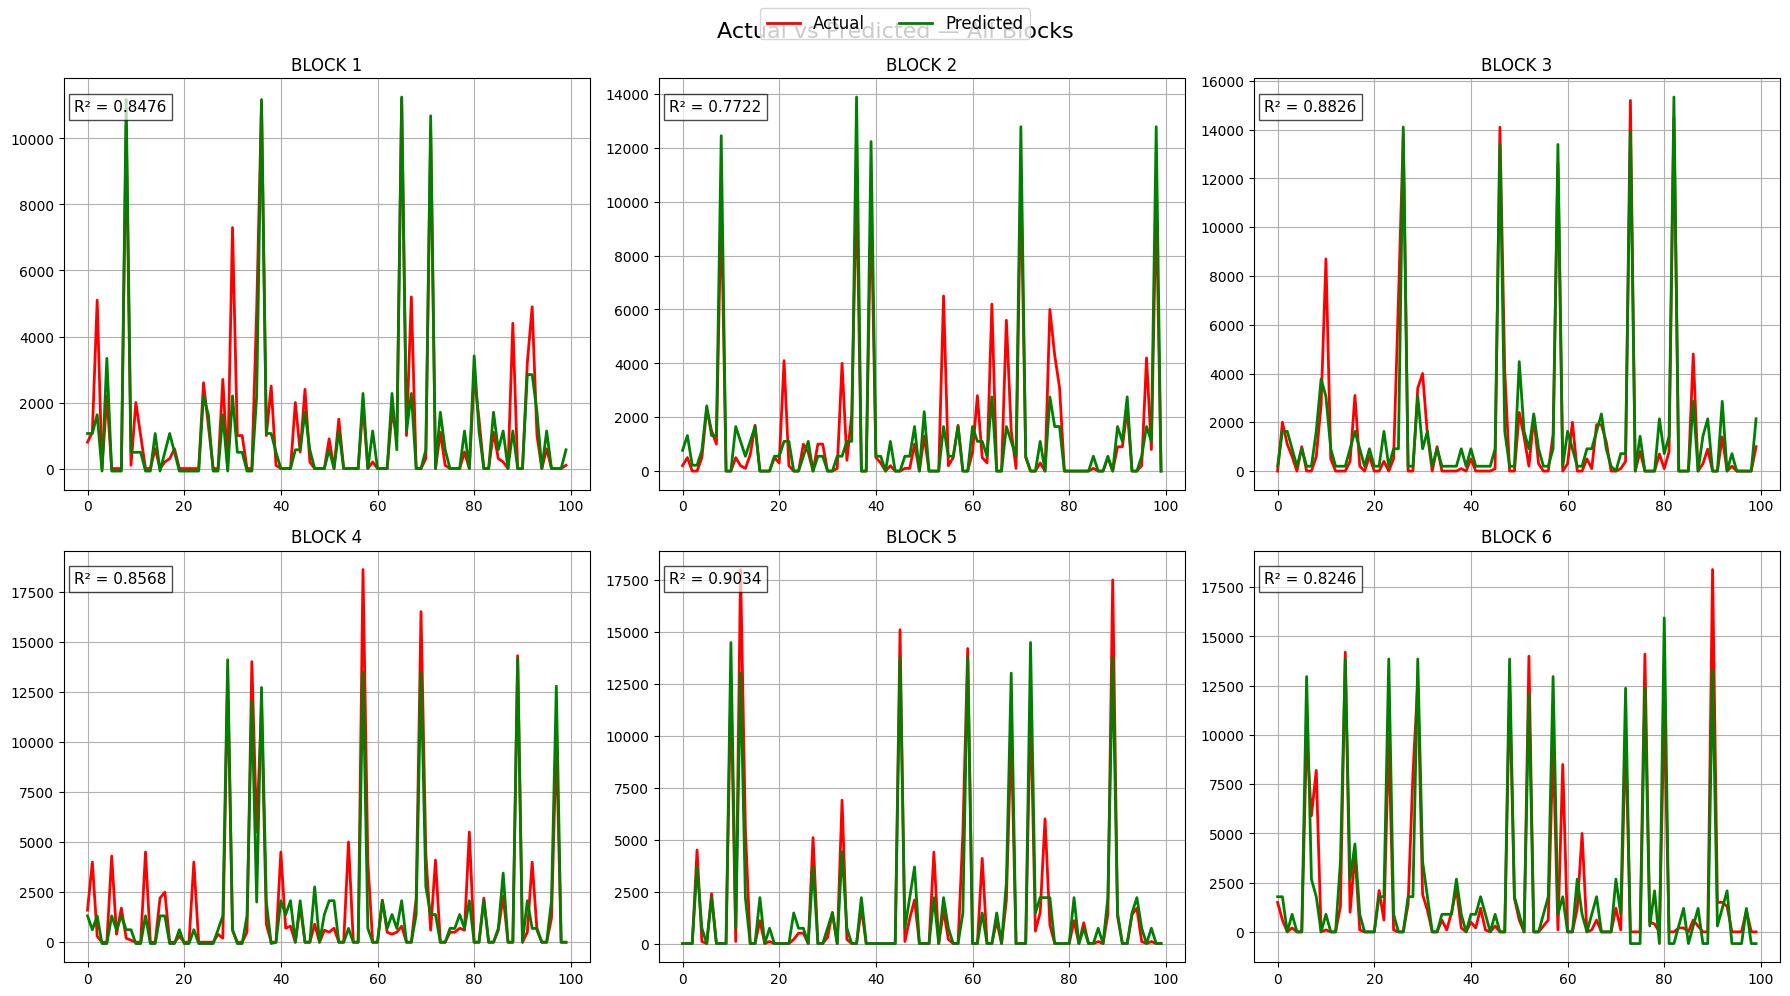

In [39]:
def plot_all_blocks(y_test_blocks, y_pred_blocks, R2_blocks):
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()   # dễ index 0–5

    for i in range(6):
        ax = axes[i]

        # Lấy dữ liệu block i
        y_test_block = y_test_blocks[i]
        y_pred_block = y_pred_blocks[i]
        R2_block     = R2_blocks[i]

        # Chuyển về DataFrame để giống style moè
        y_test_df = pd.DataFrame(y_test_block, columns=["Actual"]).reset_index()
        y_pred_df = pd.DataFrame(y_pred_block, columns=["Predicted"]).reset_index()

        # Plot Actual
        ax.plot(
            y_test_df.index,
            y_test_df["Actual"],
            label="Actual",
            linewidth=2,
            color="r"
        )

        # Plot Predicted
        ax.plot(
            y_pred_df.index,
            y_pred_df["Predicted"],
            label="Predicted",
            linewidth=2,
            color="g"
        )

        # Title block
        ax.set_title(f"BLOCK {i+1}")

        # R² text
        ax.text(
            0.02, 0.92,
            f"R² = {R2_block:.4f}",
            transform=ax.transAxes,
            fontsize=11,
            bbox=dict(facecolor="white", alpha=0.7)
        )

        ax.grid(True)

    # Legend chung
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.suptitle("Actual vs Predicted — All Blocks", fontsize=16)
    plt.show()
plot_all_blocks(y_test_blocks, y_pred_blocks, R2_blocks)


### **II. Sử dụng thư viện sklearn để tính toán, so sánh hiệu suất với một số mô hình khác**

In [36]:
#chuẩn hoá biến đầu vào
df = pd.read_excel("/Users/thuytrangneee/Downloads/data0979_enriched.xlsx")
df = df.sort_values(by="Date")
y = df["Total_Order_Demand"].values.reshape(-1, 1)
X = df.drop(columns=["Total_Order_Demand"])
X = X.select_dtypes(exclude=['datetime', 'datetimetz'])
X = pd.get_dummies(X, drop_first=True)
X = X.values.astype(float)
#chuyển sang numpy
y_np = y
X_np = X

In [37]:
total_rows = len(X_np)
num_blocks = 6
block_size = total_rows // num_blocks    
train_size = block_size - 100            
test_size = 100
print(block_size, train_size, test_size)

304 204 100


In [41]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)

    R2  = r2_score(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)

    return R2, MAE, MSE, RMSE, y_pred.reshape(-1,1)

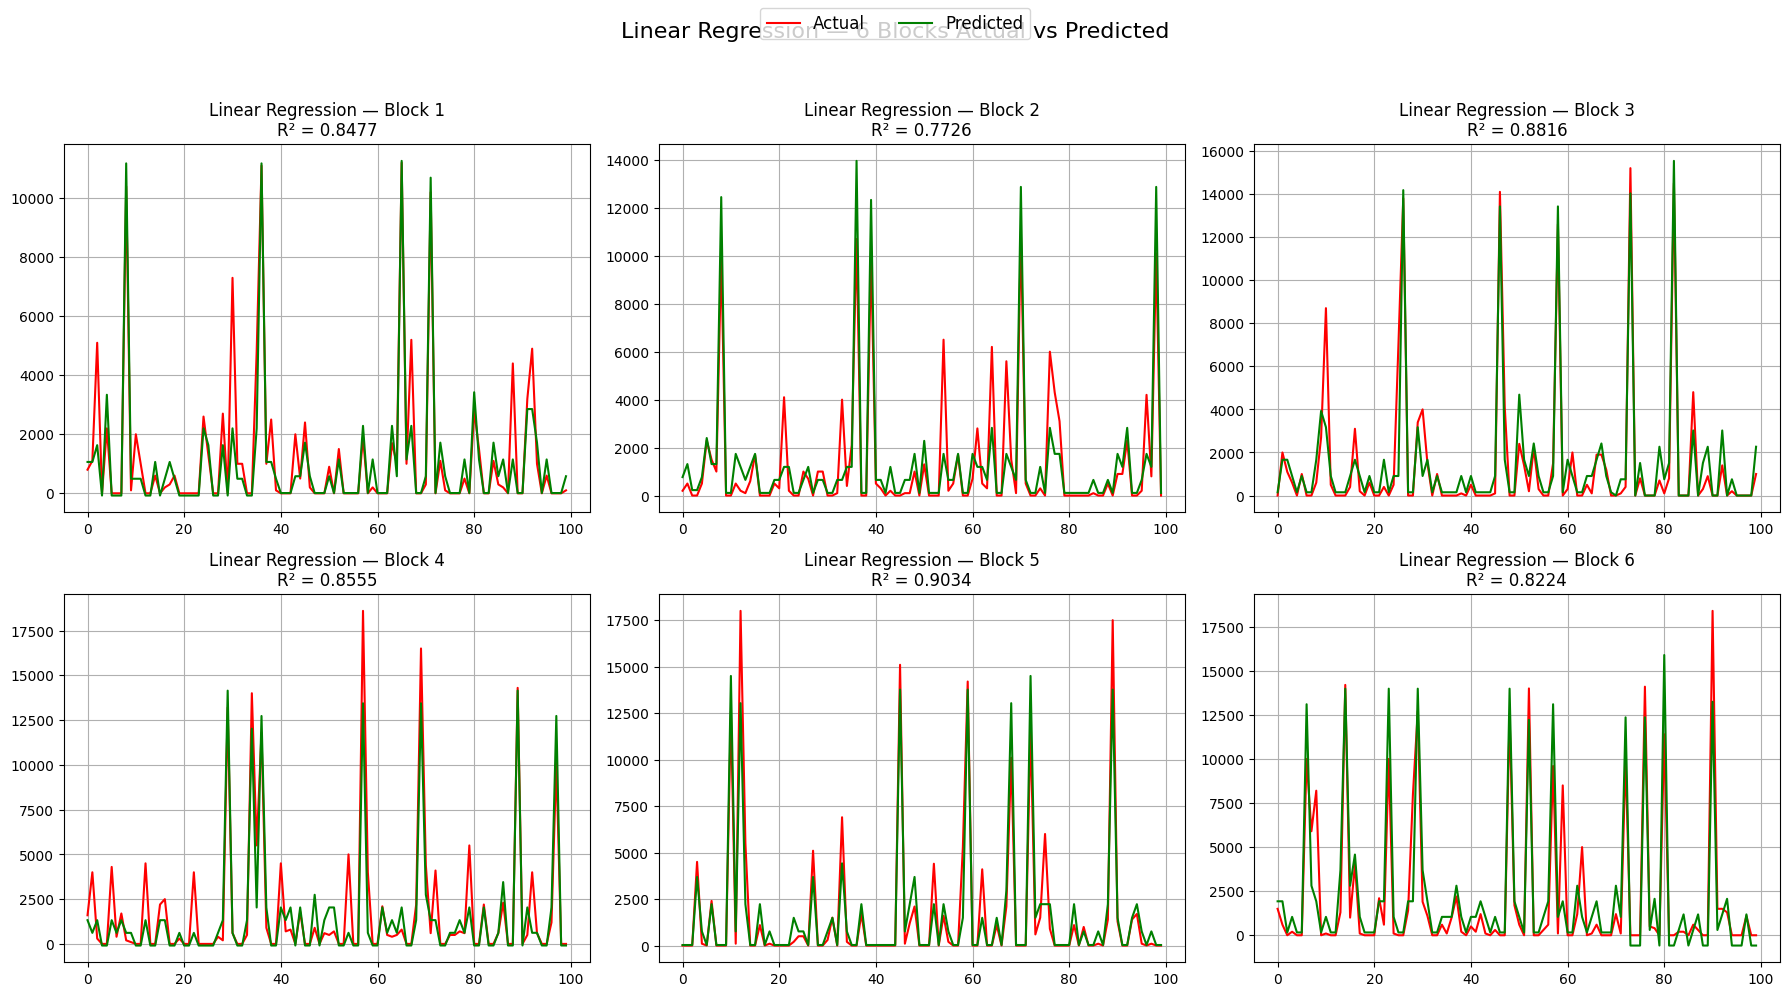

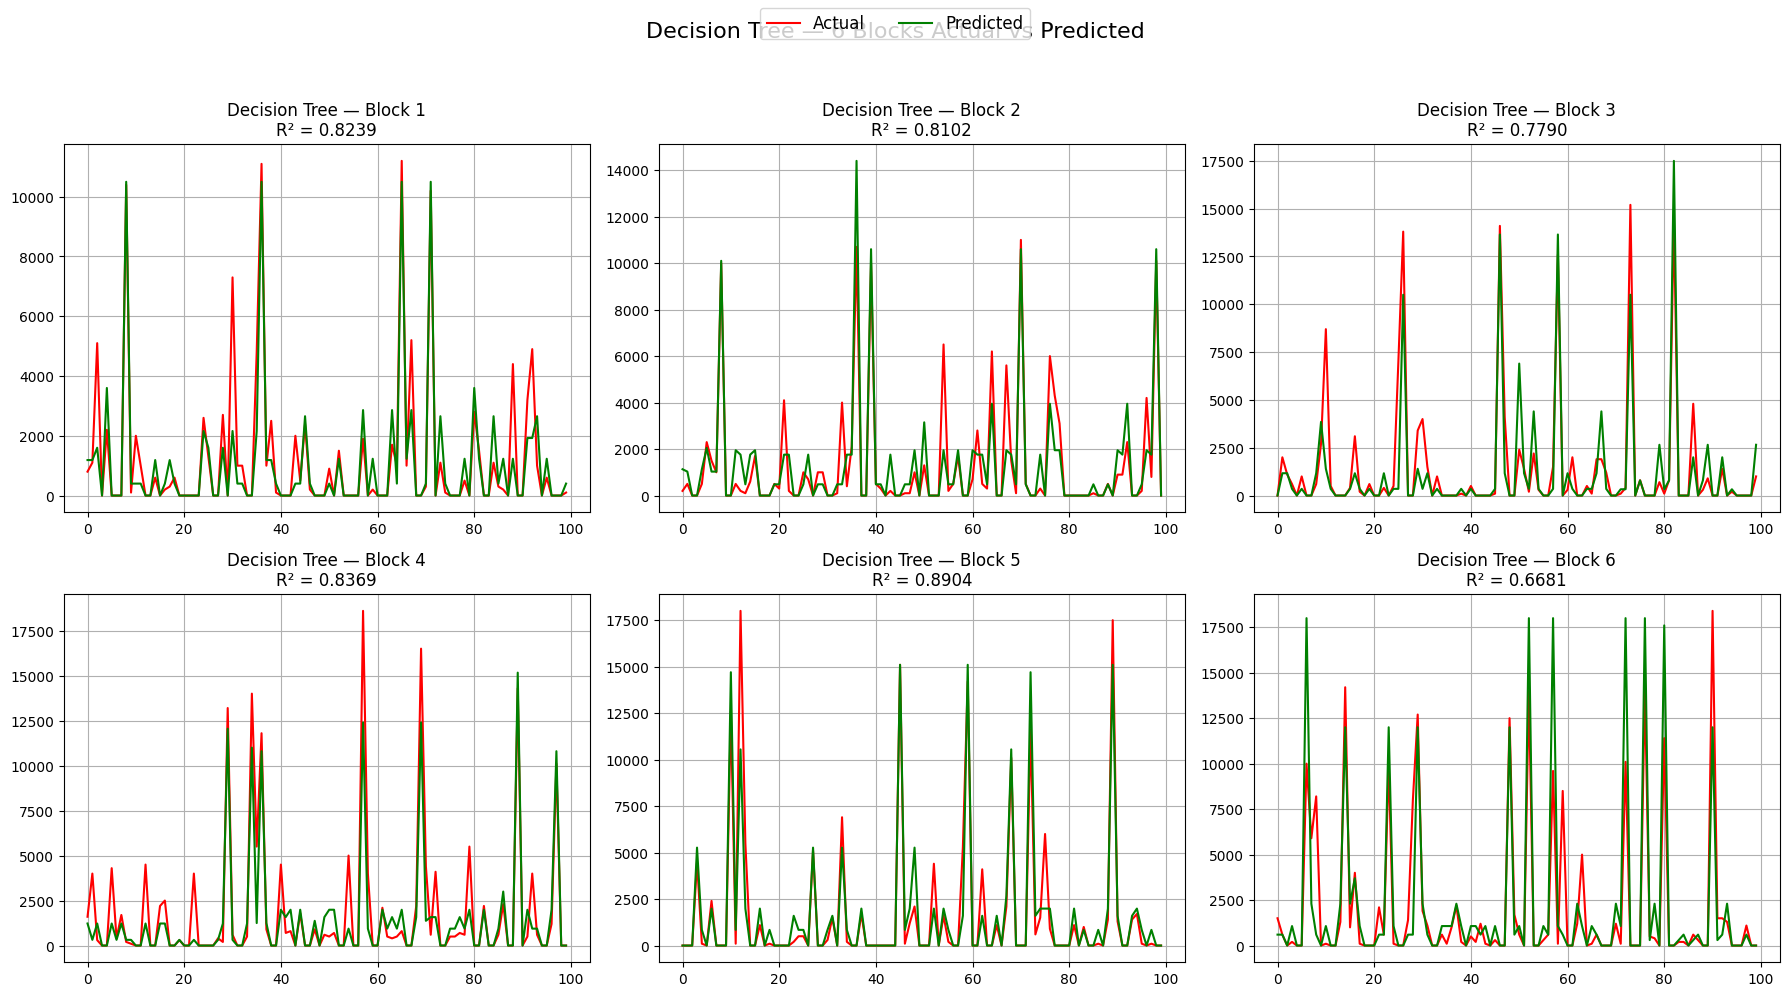

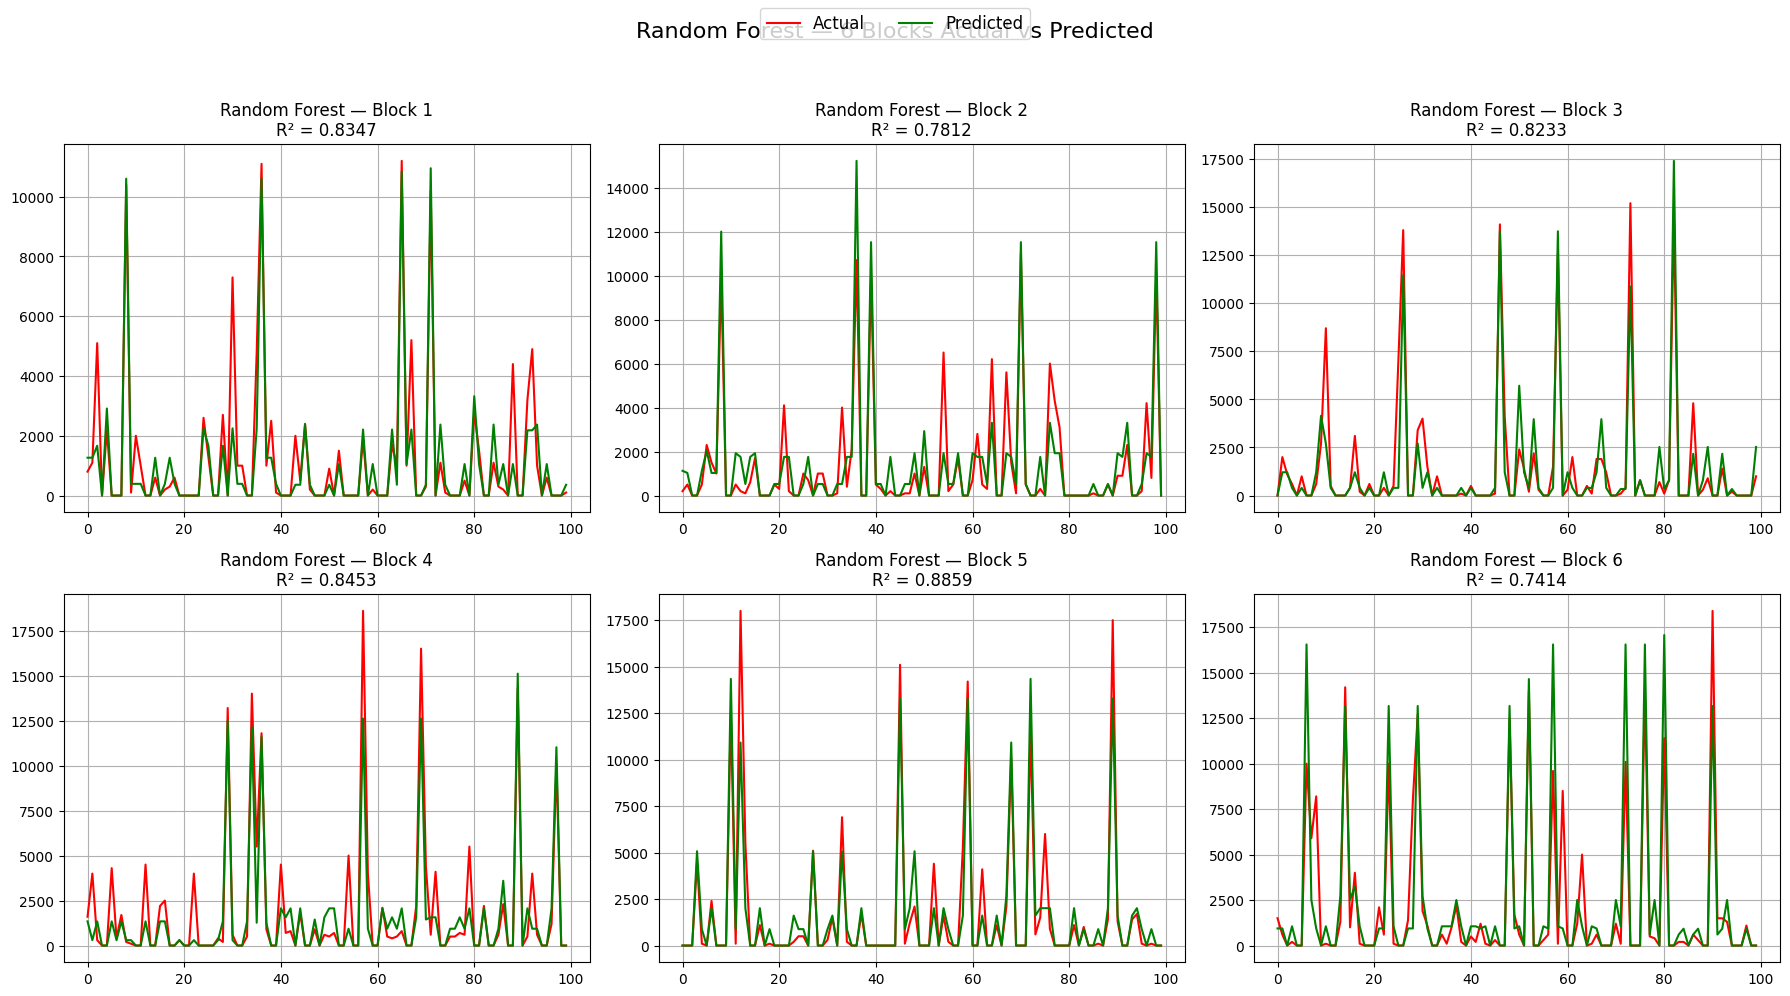

In [44]:
results = []

# Lưu y_test và y_pred để vẽ sau
y_test_blocks = []
pred_LR_blocks = []
pred_DT_blocks = []
pred_RF_blocks = []

block_id = 1

for start in range(0, total_rows, block_size):

    if start + block_size > total_rows:
        break

    # Chia block
    X_train = X_np[start : start + train_size]
    X_test  = X_np[start + train_size : start + block_size]

    y_train = y_np[start : start + train_size]
    y_test  = y_np[start + train_size : start + block_size]

    # --------------- LR ---------------
    lr = LinearRegression()
    R2_LR, MAE_LR, MSE_LR, RMSE_LR, y_pred_LR = evaluate_model(lr, X_train, y_train, X_test, y_test)

    # --------------- DT ---------------
    dt = DecisionTreeRegressor()
    R2_DT, MAE_DT, MSE_DT, RMSE_DT, y_pred_DT = evaluate_model(dt, X_train, y_train, X_test, y_test)

    # --------------- RF ---------------
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    R2_RF, MAE_RF, MSE_RF, RMSE_RF, y_pred_RF = evaluate_model(rf, X_train, y_train, X_test, y_test)

    # LƯU DỮ LIỆU
    y_test_blocks.append(y_test)
    pred_LR_blocks.append(y_pred_LR)
    pred_DT_blocks.append(y_pred_DT)
    pred_RF_blocks.append(y_pred_RF)

    # Lưu kết quả thành bảng
    results.append([
        block_id, "LinearRegression",   R2_LR, MAE_LR, MSE_LR, RMSE_LR
    ])
    results.append([
        block_id, "DecisionTree",      R2_DT, MAE_DT, MSE_DT, RMSE_DT
    ])
    results.append([
        block_id, "RandomForest",      R2_RF, MAE_RF, MSE_RF, RMSE_RF
    ])

    block_id += 1
results_df = pd.DataFrame(
    results,
    columns=["Block", "Model", "R2", "MAE", "MSE", "RMSE"]
)
results_df
def plot_6_blocks(model_name, y_test_blocks, pred_blocks, R2_values):
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for i in range(6):
        ax = axes[i]

        y_true = y_test_blocks[i]
        y_pred = pred_blocks[i]
        R2 = R2_values[i]

        ax.plot(y_true, label="Actual", color="r")
        ax.plot(y_pred, label="Predicted", color="g")

        ax.set_title(f"{model_name} — Block {i+1}\nR² = {R2:.4f}")
        ax.grid(True)

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=12)

    plt.suptitle(f"{model_name} — 6 Blocks Actual vs Predicted", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
R2_LR = results_df[results_df["Model"]=="LinearRegression"]["R2"].values
R2_DT = results_df[results_df["Model"]=="DecisionTree"]["R2"].values
R2_RF = results_df[results_df["Model"]=="RandomForest"]["R2"].values

plot_6_blocks("Linear Regression", y_test_blocks, pred_LR_blocks, R2_LR)
plot_6_blocks("Decision Tree", y_test_blocks, pred_DT_blocks, R2_DT)
plot_6_blocks("Random Forest", y_test_blocks, pred_RF_blocks, R2_RF)



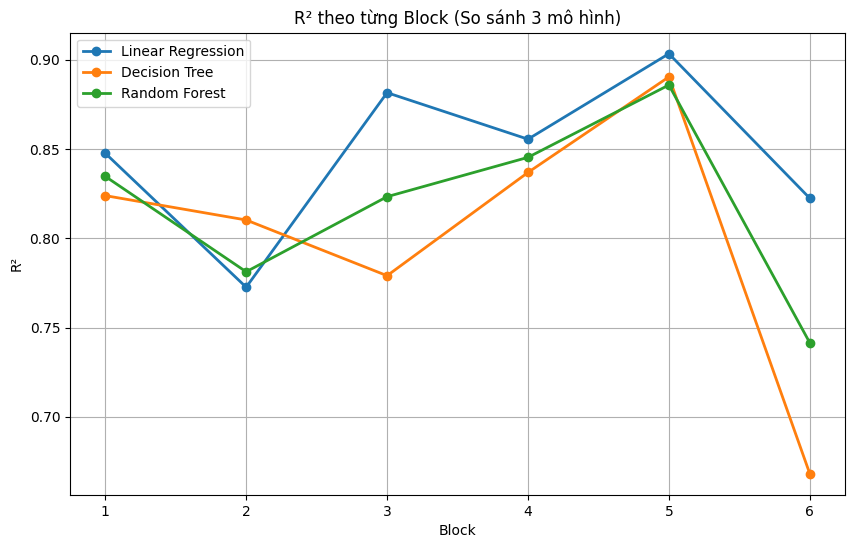

In [48]:
#so sánh hiệu suất 3 mô hình theo từng block 
blocks = range(1, 7)
plt.figure(figsize=(10,6))
plt.plot(blocks, R2_LR, marker='o', linewidth=2, label="Linear Regression")
plt.plot(blocks, R2_DT, marker='o', linewidth=2, label="Decision Tree")
plt.plot(blocks, R2_RF, marker='o', linewidth=2, label="Random Forest")
plt.title("R² theo từng Block (So sánh 3 mô hình)")
plt.xlabel("Block")
plt.ylabel("R²")
plt.xticks(blocks)
plt.grid(True)
plt.legend()
plt.show()


In [47]:
best_models = []
blocks_available = sorted(results_df["Block"].unique())
for b in blocks_available:
    df_b = results_df[results_df["Block"] == b]

    if len(df_b) == 0:
        print(f"Block {b} rỗng — bỏ qua")
        continue

    best_row = df_b.loc[df_b["R2"].idxmax()]
    best_models.append([b, best_row["Model"], best_row["R2"]])

best_models_df = pd.DataFrame(
    best_models,
    columns=["Block", "Best Model", "R²"]
)
best_models_df


,Block,Best Model,R²
0,1,LinearRegression,0.847654
1,2,DecisionTree,0.810250
2,3,LinearRegression,0.881583
3,4,LinearRegression,0.855521
4,5,LinearRegression,0.903410
5,6,LinearRegression,0.822408


##### -> *Mô hình LinearRegression có hiệu suất dự đoán cao nhất trong các mô hình, chiếm hiệu suất cao nhất trong tới 5/6 block đã tính*